In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.tri as tri
import math

#import scipy.optimize as op
#import scipy.stats
#from scipy.optimize import curve_fit
#from scipy import interpolate
#import seaborn as sns


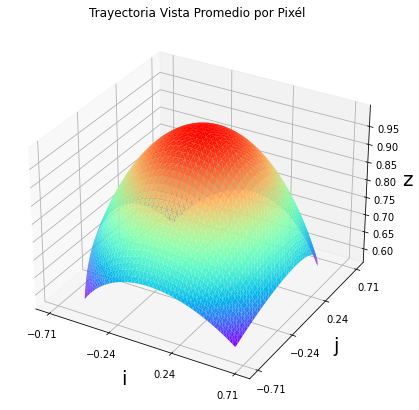

In [2]:
# variables de ajustes, de la matriz del detector
pixelsX   = 25*2 # suma de los pixéles X; matriz frontal y trasera
pixelsY   = 25*2 # suma de los pixéles Y; matriz frontal y trasera
sizePixel = 4    # tamaño de pixél x,y [cm]
DistZ     = 24   # distancia entre panel frontal y trasero (detector) [cm]
step      = 1    # tamaño de paso del np.arange(). Para determinar el tamaño de paso de pixél a pixél
pixelsTot = pixelsX*pixelsY # num. total de pixéles xy

Pxi = np.mgrid[0:pixelsX:step] # genera los índices i,j de pixéles xy
Pyj = np.mgrid[0:pixelsY:step] # del intervalo [0,pixelX/Y,step], con paso = step
#print('Índice Pxi: ',Pxi,'|# de índices: ',len(Pxi))
#print('Índice Pyj: ',Pyj,'|# de índices: ',len(Pyj))

DX = np.zeros([pixelsX,pixelsY]) # average direction of incident ray to hit a pixel on the second detector (after passing through first) 
DY = np.zeros([pixelsX,pixelsY])
dx = 0. # distancia media recorrida en pixél x; matriz frontal
dy = 0  # distancia media recorrida en pixél y; matriz frontal
for MFx in Pxi:             # recorre los pixéles del eje x; de matriz frontal 
    for MFy in Pyj:         # recorre los pixéles del eje y; de matriz frontal 
        for MRx in Pxi:     # lo mismo pero de matriz trasera
            for MRy in Pyj: # lo mismo pero de matriz trasera
                #H,V is pixels on second detector
                #comparing to the H,V pixel on the second detector (the one it passes through first)
                dx += (MRx-MFx) # horizontal distance of pixel x,y to H,V (along x axis)
                dy += (MRy-MFy) # vertical distance of pixel x,y to H,V (along z axis)
        dx = np.sum(dx)/pixelsTot # promedio de distancia recorrida entre matriz frontal y trasera
        dy = np.sum(dy)/pixelsTot # ''
        DX[MFx,MFy]= dx
        DY[MFx,MFy]= dy
        
xyz = [] # lista vacía para valores de XYZ
for X in Pxi:
    for Y in Pyj:
        if DX[X][Y] != 0 and DY[X][Y] != 0:
            arrayVct= np.array([DX[X][Y],DY[X][Y],DistZ]) # arreglo de vectores xyz
            xyz.append(arrayVct/np.linalg.norm(arrayVct)) # cálculo de vector unitario -> llena xyz lista
            
xyz = np.array(xyz) # conversión a arreglo np

# gráfico 3d Trayectoria promedio por pixél
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(xyz[:,0],xyz[:,1],xyz[:,2],cmap='rainbow')
ax.set_xticks(np.linspace(np.min(xyz[:,0]),np.max(xyz[:,0]),4).round(decimals=2)) # trazos eje x
ax.set_yticks(np.linspace(np.min(xyz[:,1]),np.max(xyz[:,1]),4).round(decimals=2)) # trazos eje y
ax.set_title('Trayectoria Vista Promedio por Pixél')
ax.set_xlabel('i',fontsize=20)
ax.set_ylabel('j',fontsize=20)
ax.set_zlabel('z',fontsize=20)
plt.show()

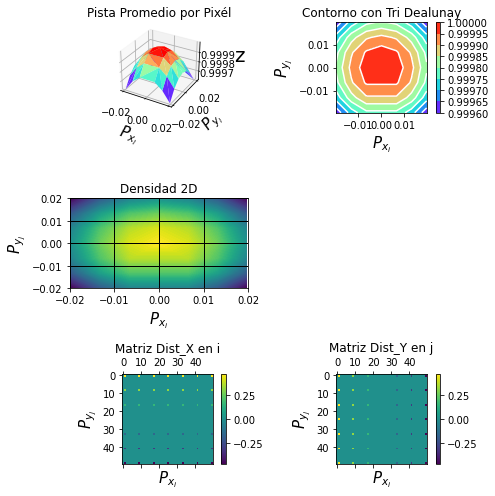

In [3]:
# inicio
# tamaño figuras
fig = plt.figure(figsize=(7,7))             
# fig 1, esquina superior izq.
ax = fig.add_subplot(3,2,1, projection='3d') # pos gráfico [3,2,1]
ax.plot_trisurf(xyz[:,0],xyz[:,1],xyz[:,2],cmap='rainbow') # gráfico de superficie 3D
ax.set_title('Pista Promedio por Pixél')     # título
ax.set_xlabel('$P_{x_{i}}$',fontsize=15)     # eje x 
ax.set_ylabel('$P_{y_{i}}$',fontsize=15)     # eje y
ax.set_zlabel('z',fontsize=20)               # eje z

# fig 2, esquina superior der.
ax = fig.add_subplot(3,2,2) # pos gráfico [3,2,2]
triDL = tri.Triangulation(xyz[:,0],xyz[:,1]) # cálculo de tríangulo Delaunay; líneas contorno solo está fig.
trcf = ax.tricontourf(xyz[:,0],xyz[:,1],xyz[:,2],cmap='rainbow') # gráfico de contorno
ax.tricontour(triDL,xyz[:,2],colors='white') # líneas de contorno de mosaíco tri en valores z
fig.colorbar(trcf)                           # barra de color y escala       
ax.set_aspect('equal')                       # aspecto del eje 
ax.set_title('Contorno con Tri Dealunay')    # ...
ax.set_xlabel('$P_{x_{i}}$',fontsize=15)     # ... 
ax.set_ylabel('$P_{y_{j}}$',fontsize=15)     # ...

# fig 3, medio
ax = fig.add_subplot(3,2,3) # pos gráfico [3,2,3]
ax.tricontourf(xyz[:,0],xyz[:,1],xyz[:,2],100)  # gráfico de densidad; similar al de arriba
ax.grid(color='black',linestyle='-',linewidth=1)# rejilla del gráfico 
ax.set_xticks(np.linspace(np.min(xyz[:,0]),np.max(xyz[:,0]),5).round(decimals=2)); # trazos eje x
ax.set_yticks(np.linspace(np.min(xyz[:,1]),np.max(xyz[:,1]),5).round(decimals=2)); # trazos eje y
ax.set_title('Densidad 2D')                  # ...
ax.set_xlabel('$P_{x_{i}}$',fontsize=15)     # ...
ax.set_ylabel('$P_{y_{j}}$',fontsize=15)     # ...

# fig 5, inf. iqz. 
ax = fig.add_subplot(3,2,5) # pos gráfico [3,2,5]
v = ax.matshow(DX) # graf. matriz de distancia en x, cálulada anteriormente
fig.colorbar(v)    # barra de color
ax.set_title('Matriz Dist_X en i')           # ...
ax.set_xlabel('$P_{x_{i}}$',fontsize=15)     # ... 
ax.set_ylabel('$P_{y_{j}}$',fontsize=15)     # ...

# fig 6, inf. iqz.
ax = fig.add_subplot(3,2,6) # pos gráfico [3,2,6]
v = ax.matshow(DY) # graf. matriz de distancia en y, cálulada anteriormente
fig.colorbar(v);   # barra de color
ax.set_title('Matriz Dist_Y en j')           # ...
ax.set_xlabel('$P_{x_{i}}$',fontsize=15)     # ...
ax.set_ylabel('$P_{y_{j}}$',fontsize=15)     # ...
fig.tight_layout() # esto se queda para quitar un texto molesto

In [3]:
def unit(x,y,z):
    M = np.sqrt(x**2 + y**2 + z**2)
    #M=1
    return x/M,y/M,z/M #flipping y and z to project vertically

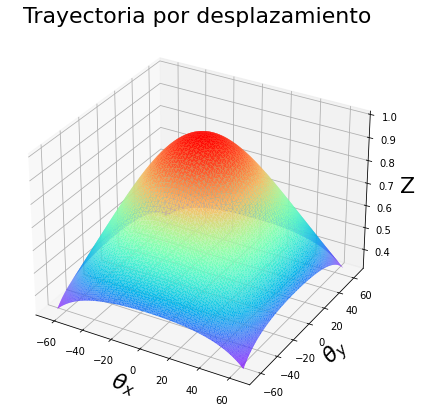

In [3]:
# inicio
DXY = [] # lista vacía de matríz de distancias XY
#dx=0
#dy=0
for MFx in Pxi:      # recorre los pixéles del eje x; de matriz frontal 
    for MFy in Pyj:  # recorre los pixéles del eje x; de matriz frontal 
        for MRx in Pxi:    # lo mismo pero de matriz trasera
            for MRy in Pyj:# lo mismo pero de matriz trasera
                dx = (MRx-MFx) # distancia relativa pixéles eje x
                dy = (MRy-MFy) # distancia relativa pixéles eje y
                DXY.append([dx,dy]) #total displacement
xyz = [] # lista vacía de pts xyz
for ij in range(len(DXY)): # recorre los pixéles ij de matriz de distancias 
    arrayVct = np.array([DXY[ij][0],DXY[ij][1],DistZ]) # arreglo de vectores xyz
    xyz.append(arrayVct/np.linalg.norm(arrayVct)) # cálculo de vector unitario -> llena xyz lista
    
xyz = np.array(xyz) # conversión a arreglo np
θx  = np.arctan(xyz[:,0]/xyz[:,2]) # cálculo θx = aTan(Δx/Δz)
θy  = np.arctan(xyz[:,1]/xyz[:,2]) # cálculo θy = aTan(Δy/Δz)
θxy = np.degrees([θx,θy]).T        # arreglo np de columnas [θx°,θy°], sucesivamente

fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(θxy[:,0],θxy[:,1],xyz[:,2],cmap='rainbow')
ax.set_title('Trayectoria por desplazamiento',fontsize=22)
ax.set_xlabel(r'$\theta_{x}$',fontsize=22)
ax.set_ylabel(r'$\theta_{y}$',fontsize=22)
ax.set_zlabel('Z',fontsize=22)
plt.show()

## Misma grafica que arriba pero un poco mas rapida

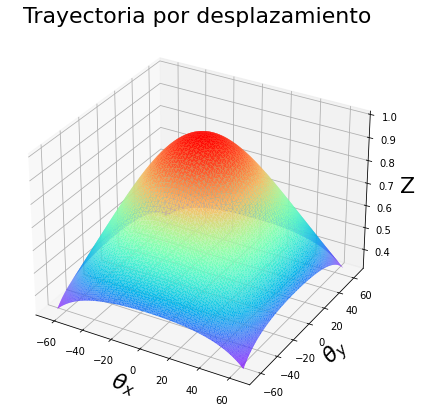

In [4]:
# inicio
DXY = [] # lista vacía de matríz de distancias XY
#dx=0
#dy=0
for MFx in Pxi:      # recorre los pixéles del eje x; de matriz frontal 
    for MFy in Pyj:  # recorre los pixéles del eje x; de matriz frontal 
        for MRx in Pxi:    # lo mismo pero de matriz trasera
            for MRy in Pyj:# lo mismo pero de matriz trasera
                dx = (MRx-MFx) # distancia relativa pixéles eje x
                dy = (MRy-MFy) # distancia relativa pixéles eje y
                DXY.append([dx,dy]) #total displacement
                
xyz = [np.array([DXY[ij][0],DXY[ij][1],DistZ])/np.linalg.norm(np.array([DXY[ij][0],DXY[ij][1],DistZ])) 
       for ij in range(len(DXY))] # lista vacía de pts xyz
    
xyz = np.array(xyz) # conversión a arreglo np
θx  = np.arctan(xyz[:,0]/xyz[:,2]) # cálculo θx = aTan(Δx/Δz)
θy  = np.arctan(xyz[:,1]/xyz[:,2]) # cálculo θy = aTan(Δy/Δz)
θxy = np.degrees([θx,θy]).T        # arreglo np de columnas [θx°,θy°], sucesivamente

fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(θxy[:,0],θxy[:,1],xyz[:,2],cmap='rainbow')
ax.set_title('Trayectoria por desplazamiento',fontsize=22)
ax.set_xlabel(r'$\theta_{x}$',fontsize=22)
ax.set_ylabel(r'$\theta_{y}$',fontsize=22)
ax.set_zlabel('Z',fontsize=22)
plt.show()

# Con correción de desplazamiento Resolución Angular

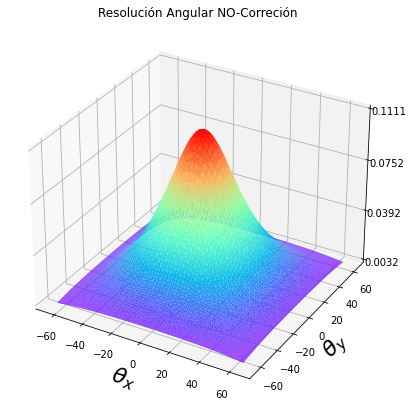

In [5]:
solidOm = [] # lista vacía ángulo sólido(𝛺)
xyz = []     # reseto a lista vacía índices pixeles ij y pos Z(DistZ)
for i in range(len(DXY)): # ángulo sólido acumulado de cada pixél; recorriendo los índices ij.
    r = np.sqrt(pow(DXY[i][0],2) + pow(DXY[i][1],2) + pow(DistZ/2,2)) # radío, ángulo sólido r = √(x^2+y^2+z^2)
    # cálculo de ángulo sólido de cada pixél
    𝛺 = sizePixel**2/r**2 # 𝛺 = Área/r^2 -> max(𝛺)= Área pixél/ (DistZ/2)^2
    xyz.append([DXY[i][0],DXY[i][1],DistZ]) # llena lista xyz, paquetes de 3; valor de ij -> 𝛺 
    solidOm.append(𝛺) # llenado de lista de 𝛺
xyz = np.array(xyz)    

θx  = np.arctan(xyz[:,0]/xyz[:,2]) # cálculo θx = aTan(Δx/Δz)
θy  = np.arctan(xyz[:,1]/xyz[:,2]) # cálculo θy = aTan(Δy/Δz)
θxy = np.degrees([θx,θy]).T        # arreglo np de columnas [θx°,θy°], sucesivamente
    
fig = plt.figure(figsize=(12,7))   # figura
ax = plt.axes(projection='3d')     # eje fig
ax.plot_trisurf(θxy[:,0],θxy[:,1],solidOm, cmap='rainbow') # gráfico de θxy -> 𝛺
ax.set_zticks(np.linspace(min(solidOm),max(solidOm),4))    # trazos eeje z
ax.set_xlabel(r'$\theta_{x}$',fontsize=22)
ax.set_ylabel(r'$\theta_{y}$',fontsize=22)
ax.set_title('Resolución Angular NO-Correción');

# Se tardó la mitad de Me Myself and I

### Misma grafica de arriba pero mas rapida

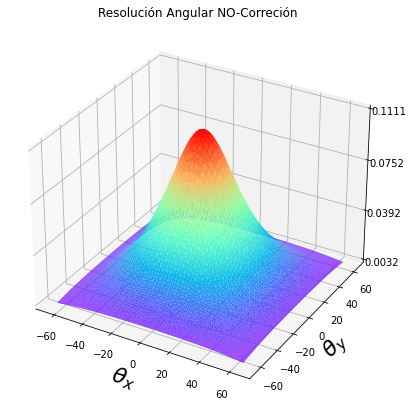

In [34]:
DXY_np = np.array(DXY)
r = np.sqrt(pow(DXY_np[:,0],2) + pow(DXY_np[:,1],2) + pow(DistZ/2,2))
𝛺 = sizePixel**2/r**2
xyz = np.array([DXY_np[:,0],DXY_np[:,1],DistZ], dtype='object')
θx = np.arctan(xyz[0]/xyz[2])
θy = np.arctan(xyz[1]/xyz[2])
θxy = np.degrees([θx,θy]).T
solidOm = 𝛺

fig = plt.figure(figsize=(12,7))   # figura
ax = plt.axes(projection='3d')     # eje fig
ax.plot_trisurf(θxy[:,0], θxy[:,1], solidOm, cmap='rainbow') # gráfico de θxy -> 𝛺
ax.set_zticks(np.linspace(min(solidOm), max(solidOm), 4))    # trazos eeje z
ax.set_xlabel(r'$\theta_{x}$', fontsize=22)
ax.set_ylabel(r'$\theta_{y}$', fontsize=22)
ax.set_title('Resolución Angular NO-Correción');

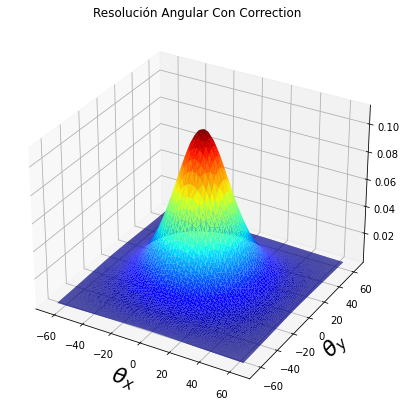

In [38]:
solidOm = [] # lista vacía ángulo sólido(𝛺)
xyz = []     # reseto a lista vacía índices pixeles ij y pos Z(DistZ)
for i in range(len(DXY)):
    r = np.sqrt(pow(DXY[i][0],2) + pow(DXY[i][1],2) + pow(DistZ/2,2)) # radió 𝛺 
    θ = np.degrees(np.arctan(DXY[i][0]/(DistZ/2))) # ángulo θ -> θx
    𝜙 = np.degrees(np.arctan(DXY[i][1]/(DistZ/2))) # ángulo 𝜙 -> θy
    # cálculo de ángulo sólido de cada pixél
    Area = pow(sizePixel,2) # área de pixel XY -> 4cm * 4cm
    𝛺 = (Area * np.cos(np.radians(θ)) * np.cos(np.radians(𝜙)) )/r**2  # 𝛺 = (Área * cosθ * cos𝜙/r^2 -> máx(𝛺) = ''/ (DistZ/2)^2
    solidOm.append(𝛺) # llenado de lista de 𝛺
    xyz.append([DXY[i][0],DXY[i][1],DistZ]) # llena lista xyz, paquetes de 3; valor de ij -> 𝛺 

xyz = np.array(xyz)    
θx  = np.arctan(xyz[:,0]/xyz[:,2]) # cálculo θx = aTan(Δx/Δz)
θy  = np.arctan(xyz[:,1]/xyz[:,2]) # cálculo θy = aTan(Δy/Δz)
θxy = np.degrees([θx,θy]).T        # arreglo np de columnas [θx°,θy°], sucesivamente
    
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(θxy[:,0],θxy[:,1],solidOm, cmap='jet')
ax.set_xlabel(r'$\theta_{x}$',fontsize=22)
ax.set_ylabel(r'$\theta_{y}$',fontsize=22)
ax.set_title('Resolución Angular Con Correction')
plt.show()

### Grafica de arriba pero mas rapida

Text(0.5, 0.92, 'Resolución Angular Con Correction')

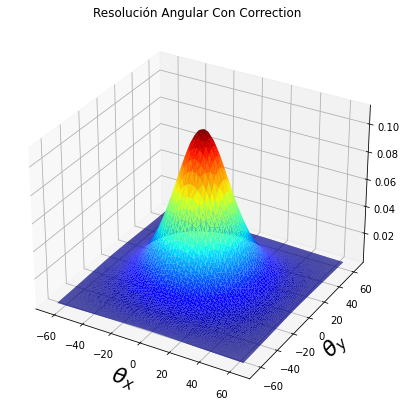

In [40]:
r = np.sqrt(pow(DXY_np[:,0],2) + pow(DXY_np[:,1],2) + pow(DistZ/2,2))
θ = np.degrees(np.arctan(DXY_np[:,0]/(DistZ/2))) # ángulo θ -> θx
𝜙 = np.degrees(np.arctan(DXY_np[:,1]/(DistZ/2))) # ángulo 𝜙 -> θy
Area = pow(sizePixel,2)
𝛺 = (Area * np.cos(np.radians(θ)) * np.cos(np.radians(𝜙)) )/r**2
solidOm = 𝛺
xyz = np.array([DXY_np[:,0],DXY_np[:,1],DistZ], dtype='object')
θx = np.arctan(xyz[0]/xyz[2])
θy = np.arctan(xyz[1]/xyz[2])
θxy = np.degrees([θx,θy]).T

fig = plt.figure(figsize=(12,7))   # figura
ax = plt.axes(projection='3d')     # eje fig
ax.plot_trisurf(θxy[:,0], θxy[:,1], solidOm, cmap='jet') # gráfico de θxy -> 𝛺
ax.set_xlabel(r'$\theta_{x}$', fontsize=22)
ax.set_ylabel(r'$\theta_{y}$', fontsize=22)
ax.set_title('Resolución Angular Con Correction');

Text(0.5, 0.92, 'Angular Resolution With Tilt Correction')

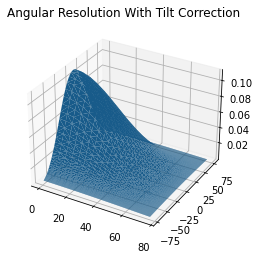

In [68]:
# now just plot the solid angle as a function of these angles. 
#solid angle is the area of a sphere covered by that solid angle. i.e. A/r^2 = 2cmx2cm / r^2 where 
#r is the distance between the two pixels ie. sqrt(dx^2 + dy^2 + dz^2)

Xvals = []
Yvals = []
SRvals = [] #solid angle
for i in range(100000):
    x=DXY[i][0]
    y=DXY[i][1]
    z=24/2 #(half distance between the detectors)
    r = np.sqrt((x)**2 + (y)**2 + (z)**2)
    A = 4*4
    thetax = math.degrees(math.atan(x/z)) # by angle
    thetay = math.degrees(math.atan(y/z))
    Afix = A*math.cos(math.atan(x/z))*math.cos(math.atan(y/z))
    SR = Afix/r**2
    Xvals.append(thetax)
    Yvals.append(thetay)
    SRvals.append(SR)
    #ax.scatter(x,y,SR)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(Xvals,Yvals,SRvals)
#ax.set_xlabel('theta x')
#ax.set_ylabel('theta y')
ax.set_title('Angular Resolution With Tilt Correction')

In [145]:
Acc = np.zeros(len(DXY)) #all of the distances (dx,dy i.e. r_mn)
i = np.arange(1,num_total_pixels_x, step) #480 horizontally
j = np.arange(1,num_total_pixels_y, step) #120 vertically
for Hpix in i: #for all 480 pixels along the x axis
    for Vpix in j: #for all 120 pixels along the y axis
        for H in i: #for every pixel on the second detector x axis
            for V in j:#for every pixel on the second detector y axis
                # for every combination of pixels
                dx = Hpix-H #horizontal relative displacement
                dy = Vpix-V #vertical relative displacement
                dxy = [dx,dy] #total displacement
                if dxy in DXY: #So if this displacement exists
                    Acc[DXY.index(dxy)]= Acc[DXY.index(dxy)]+1 #add one count to this displacement

Xvals = []
Yvals = []
Zvals = [] #acceptance (i.e. detection area times angular resolution)
for i in range(len(DXY)):
    x=DXY[i][0]
    y=DXY[i][1]
    AccArea=np.float64(Acc[i])*(PX*PX) #Number of pixel pairs times area of pixels
    Acceptance = AccArea * SRvals[i] #that area times the angular resolutionAccArea = 
    #Xvals.append(x)
    #Yvals.append(y)
    thetax = math.degrees(math.atan(x/z)) # by angle
    thetay = math.degrees(math.atan(y/z))
    Xvals.append(thetax)
    Yvals.append(thetay)
    Zvals.append(Acceptance)
    #ax.scatter(x,y,SR)
    
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(Xvals, Yvals, Zvals, cmap='jet')
plt.title('Acceptance');

NameError: name 'num_total_pixels_x' is not defined

In [57]:
(4**2*math.cos(0)*math.cos(4.763)/12.04**2)

0.005583759108935615

In [58]:
(4**2*np.cos(0)*np.cos(4.763))/(12.04**2)

0.005583759108935615

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=15b8a446-4d0f-401e-af2c-54f823f65282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [166]:
# gráfico de PLotLy
"""import plotly.figure_factory as ff
import numpy as np
from scipy.spatial import Delaunay

x = xyz[:,0]
y = xyz[:,1]
z = xyz[:,2]
points2D = np.vstack([x,y]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x, y, z,
                         simplices=simplices,
                         title="Torus", aspectratio=dict(x=1, y=1, z=0.3))
fig.show()
"""

'import plotly.figure_factory as ff\nimport numpy as np\nfrom scipy.spatial import Delaunay\n\nx = xyz[:,0]\ny = xyz[:,1]\nz = xyz[:,2]\npoints2D = np.vstack([x,y]).T\ntri = Delaunay(points2D)\nsimplices = tri.simplices\n\nfig = ff.create_trisurf(x, y, z,\n                         simplices=simplices,\n                         title="Torus", aspectratio=dict(x=1, y=1, z=0.3))\nfig.show()\n'